In [2]:
import numpy as np
import matplotlib.pyplot as plt

The logistic map $f_r(x)$ is given by $f_r(x)=r x (1 - x)$.  We can start with $x_0=0.5$ and consider the values $x_1=f_r(x_0)$ and $x_2=f_r(x_1)=f_r(f_r(x_0))$ and $x_3=f_r(x_2)=f_r(f_r(f_r(x_0)))$ and so on.  The eventual behaviour of the sequence $(x_0,x_1,x_2,\dotsc)$ depends in an interesting way on the value of $r$.  If $r$ is between $2$ and $3$, then the sequence converges to a single value.  If $r$ is between $3$ and about $3.45$ then the sequence does not converge to a single value, but instead alternates between two different values.  As $r$ increases from $3.45$ to $4$, various different things happen: sometimes the sequence cycles through a finite list of values, but sometimes it is completely chaotic.  There is an elaborate mathematical theory about these phenomena (you can search for Sharkovskii's theorem, or the Feigenbaum constant, if you are interested).

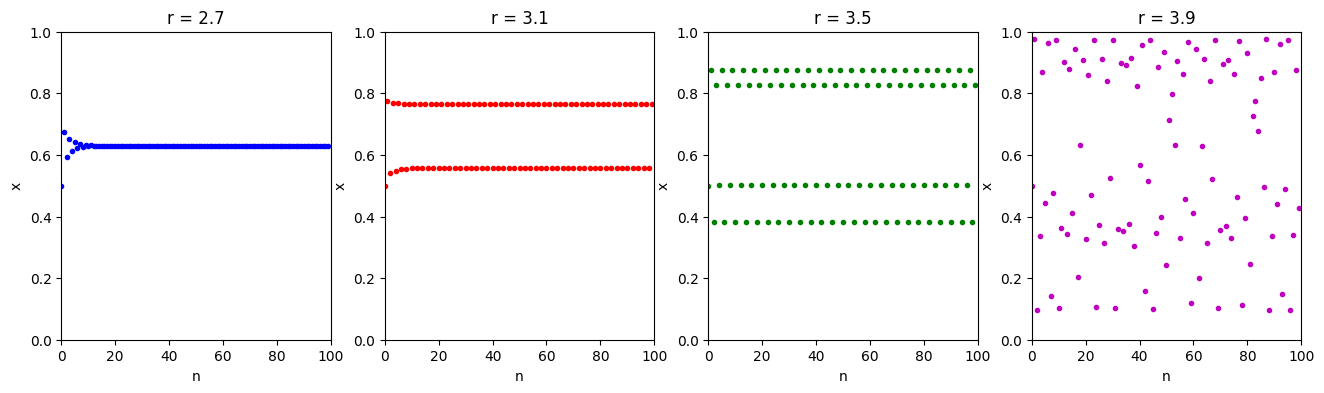

In [7]:
def logistic_seq(r = 2.0, N = 100):
    """The logistic sequence for a given r and N.

    This function returns [x[0],...,x[N-1]], where x[0] = 0.5 and 
    x[n+1] = r*x[n]*(1-x[n]) for n = 0,...,N-2.
    """
    xs = np.zeros(N)
    xs[0] = 0.5
    for i in range(N-1):
        xs[i+1] = r * xs[i] * (1 - xs[i])
    return xs

rs = [2.7, 3.1, 3.5, 3.9]
cols = ['b.','r.','g.','m.']

fig, ax = plt.subplots(1, 4, figsize=(16,4))

for i in range(4):
    ax[i].plot(logistic_seq(rs[i]), cols[i])
    ax[i].set_title('r = ' + str(rs[i]))
    ax[i].set_xlabel('n')
    ax[i].set_ylabel('x')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(0,100)


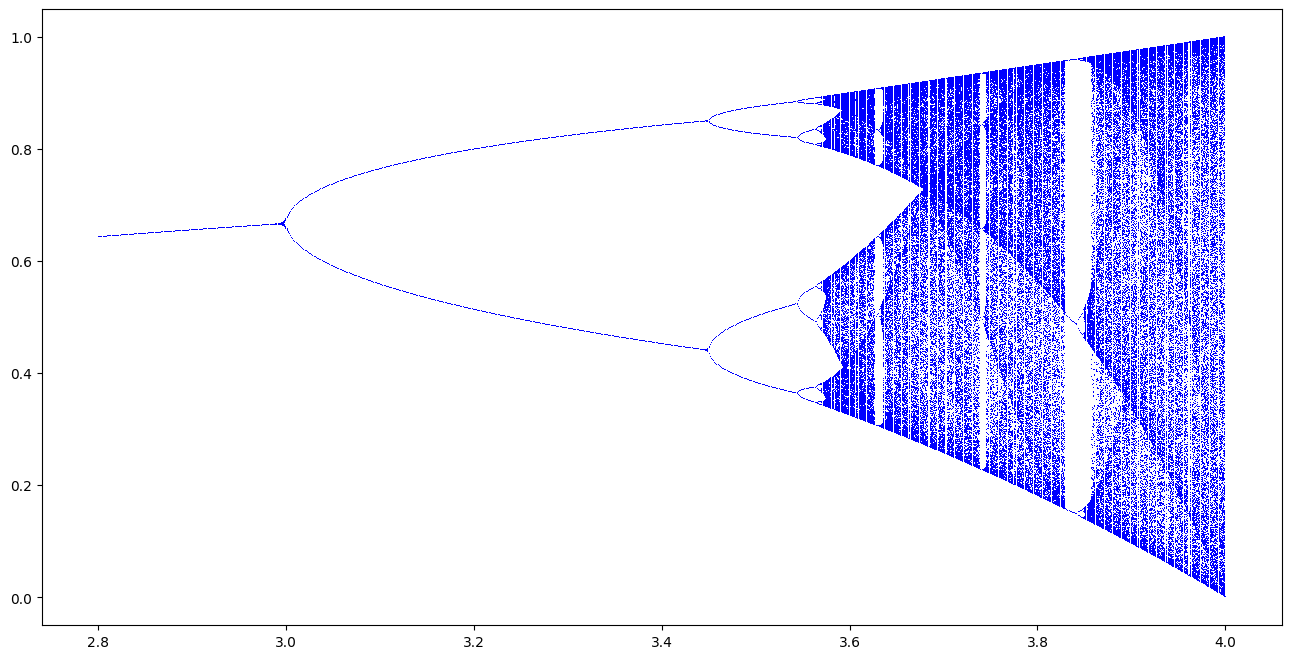

In [25]:
N = 1000  # number of r values
M = 500   # the number of iterations is 2*M, but the first M are discarded
rs = np.linspace(2.8, 4.0, N) # array of values of r

# The next few lines are essentially the same as the logistic_seq function above
# but reorganised to allow for vectorization
xs = np.zeros((N, 2 * M))
xs[:,0] = 0.5
for i in range(2 * M - 1):
    xs[:,i+1] = rs * xs[:,i] * (1 - xs[:,i])

xs = xs[:,M:] # discard the first M iterations for each value of r

# Make an array rs_array of the same shape as xs with rs_array[i,j] = rs[i]
rs_array = (rs.reshape((N,1)) * np.ones((1,M)))

plt.figure(figsize=(16,8))
P = plt.plot(rs_array, xs, 'b,') # Assign to a variable P to supress useless output